In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
data = pd.read_csv("tinkoff_legal_entities_new.csv")

In [302]:
per = lambda x: x / 15000 * 100

In [303]:
data.sample(5)

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,defendant_case_perc,rating_ya,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito
2820,a7602145623a,2022-05-27 00:00:00,5,0.0,0.0,0.0,130.0,0.0,3.0,NaN,...,NaN,4.15,70.0,23.0,4.250,0.0,0.000000,0.0,NaN,NaN
1374,a540314042995a,2022-09-22 00:00:00,2,0.0,0.0,0.0,91.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10257,a183200726864a,2021-06-03 00:00:00,1,0.0,0.0,0.0,46.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001,a2203010657a,2022-10-29 00:00:00,14,0.0,0.0,0.0,5416.0,0.0,8.0,0.0,...,NaN,4.40,25.0,8.0,4.125,0.0,2.933333,84.0,NaN,NaN
13641,a781712084179a,2022-10-16 00:00:00,1,0.0,0.0,0.0,1053.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
data.shape

(15000, 35)

In [305]:
data.isna().sum() / data.shape[0] * 100

id                           0.000000
date                         0.000000
phones_num                   0.000000
phb_fraud                    0.073333
phb_dirty                    0.073333
phb_all_bad                  0.073333
phb_all                      0.073333
phb_bad_perc                 0.073333
found_phones                 0.073333
phb_fraud_dir                8.206667
phb_dirty_dir                8.206667
phb_all_bad_dir              8.206667
phb_all_dir                  8.206667
phb_bad_perc_dir             8.206667
found_phones_dir             8.206667
claims_percent              34.013333
claims_num                  34.013333
appl_num                    34.013333
complaints_num              99.880000
complaints_num_dir          99.693333
mvd_request_num             93.320000
bad_rep_tcb                 99.153333
total_case_cnt              99.573333
total_defendant_case_cnt    99.573333
total_defendant_case_amt    99.573333
defendant_case_perc         99.573333
rating_ya   

<AxesSubplot:>

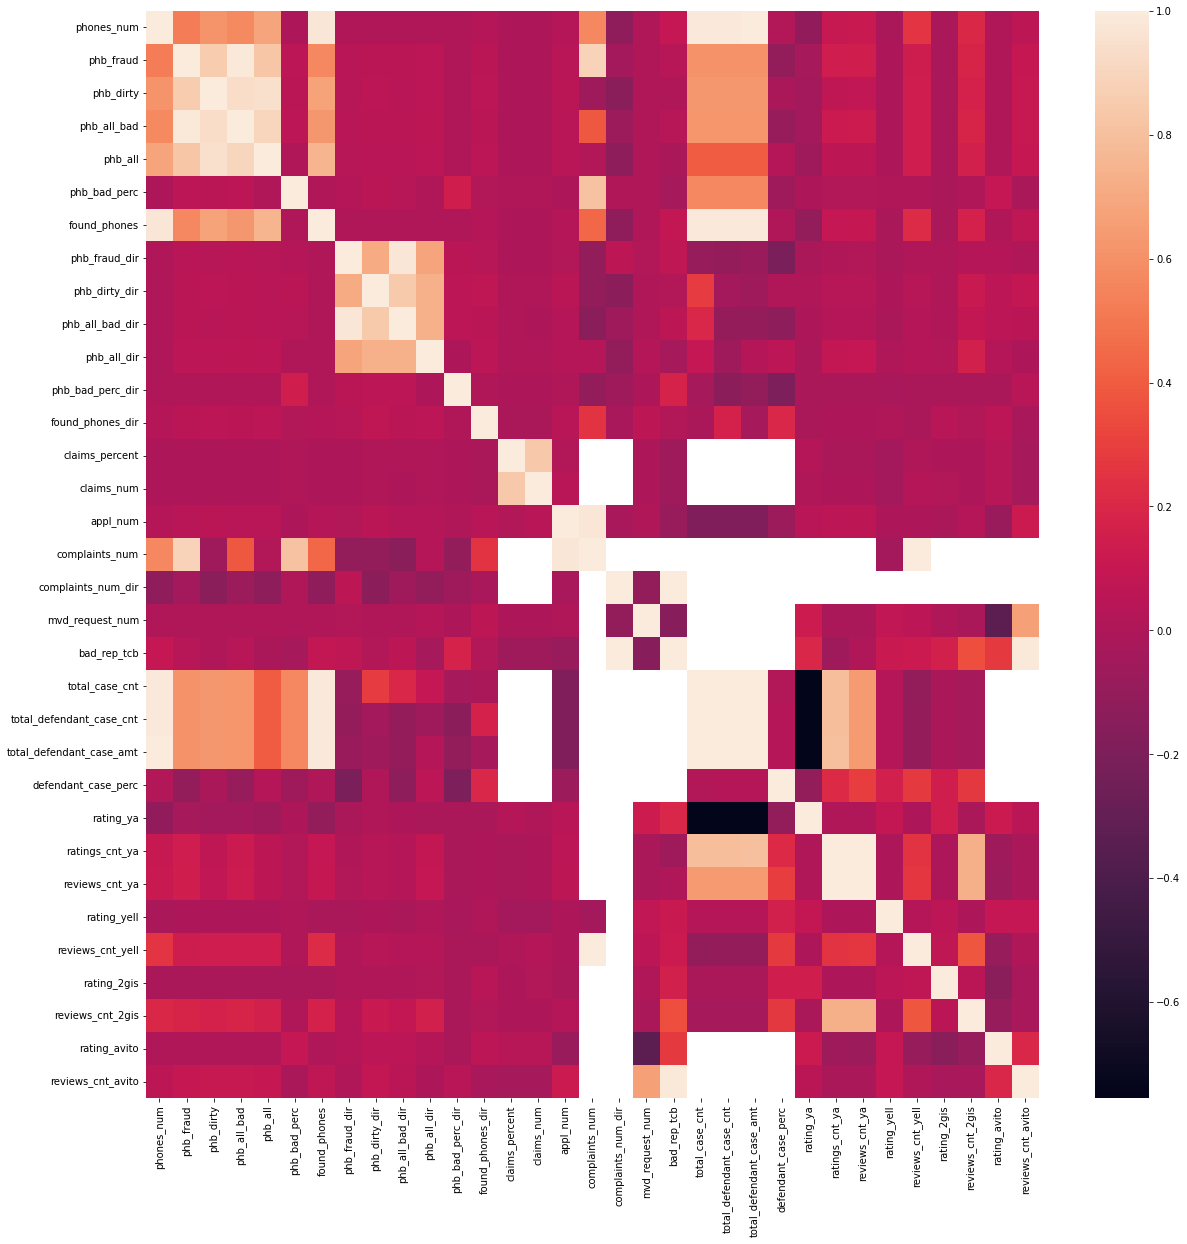

In [306]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr())

In [307]:
data.columns

Index(['id', 'date', 'phones_num', 'phb_fraud', 'phb_dirty', 'phb_all_bad',
       'phb_all', 'phb_bad_perc', 'found_phones', 'phb_fraud_dir',
       'phb_dirty_dir', 'phb_all_bad_dir', 'phb_all_dir', 'phb_bad_perc_dir',
       'found_phones_dir', 'claims_percent', 'claims_num', 'appl_num',
       'complaints_num', 'complaints_num_dir', 'mvd_request_num',
       'bad_rep_tcb', 'total_case_cnt', 'total_defendant_case_cnt',
       'total_defendant_case_amt', 'defendant_case_perc', 'rating_ya',
       'ratings_cnt_ya', 'reviews_cnt_ya', 'rating_yell', 'reviews_cnt_yell',
       'rating_2gis', 'reviews_cnt_2gis', 'rating_avito', 'reviews_cnt_avito'],
      dtype='object')

In [308]:
data.phb_bad_perc_dir.isna().sum()

1231

In [309]:
data.phb_all_dir.isna().sum()

1231

In [310]:
data.phones_num.isna().sum()

0

In [311]:
data.claims_percent.value_counts()

0.00      9818
50.00       25
33.33       19
40.00        7
66.67        7
100.00       4
60.00        3
25.00        3
58.33        1
57.14        1
63.64        1
75.00        1
42.86        1
85.71        1
70.00        1
14.29        1
7.14         1
20.00        1
62.50        1
71.43        1
Name: claims_percent, dtype: int64

In [328]:
rating_columns = [
    "rating_ya",
    "rating_yell",
    "rating_avito",
    "rating_2gis",
    "ratings_cnt_ya"
]

reviews_count_columns = [
    "reviews_cnt_ya",
    "reviews_cnt_yell",
    "reviews_cnt_2gis",
    "reviews_cnt_avito"
]

phones = [
    "phb_bad_perc_dir",
    "phb_all_dir", # !
    "phb_all_bad_dir", # !
    "phb_dirty_dir",
    "phb_fraud_dir",
    "phb_bad_perc",
    "found_phones_dir",
    "phb_all",
    "phb_all_bad",
    "phb_dirty",
    "phb_fraud",
    "found_phones",
    "phones_num"

]

bank_and_police = [
    "total_defendant_case_amt",
    "defendant_case_perc",
    "total_defendant_case_cnt",
    "total_case_cnt",
    "mvd_request_num",
    "complaints_num_dir",
    "complaints_num",
    "claims_percent",
    "appl_num",
    "bad_rep_tcb"
]

data_without_description = [
    "claims_num",
]

In [329]:
data[rating_columns] = data[rating_columns].fillna(-1)

In [330]:
data[reviews_count_columns] = data[reviews_count_columns].fillna(0)

In [331]:
data[phones] = data[phones].fillna(0)

In [332]:
data[bank_and_police] = data[bank_and_police].fillna(0)

In [333]:
data.isna().sum()

id                          0
date                        0
phones_num                  0
phb_fraud                   0
phb_dirty                   0
phb_all_bad                 0
phb_all                     0
phb_bad_perc                0
found_phones                0
phb_fraud_dir               0
phb_dirty_dir               0
phb_all_bad_dir             0
phb_all_dir                 0
phb_bad_perc_dir            0
found_phones_dir            0
claims_percent              0
claims_num                  0
appl_num                    0
complaints_num              0
complaints_num_dir          0
mvd_request_num             0
bad_rep_tcb                 0
total_case_cnt              0
total_defendant_case_cnt    0
total_defendant_case_amt    0
defendant_case_perc         0
rating_ya                   0
ratings_cnt_ya              0
reviews_cnt_ya              0
rating_yell                 0
reviews_cnt_yell            0
rating_2gis                 0
reviews_cnt_2gis            0
rating_avi

In [334]:
data[data_without_description] = data[data_without_description].fillna(0)

In [335]:
data.isna().sum()

id                          0
date                        0
phones_num                  0
phb_fraud                   0
phb_dirty                   0
phb_all_bad                 0
phb_all                     0
phb_bad_perc                0
found_phones                0
phb_fraud_dir               0
phb_dirty_dir               0
phb_all_bad_dir             0
phb_all_dir                 0
phb_bad_perc_dir            0
found_phones_dir            0
claims_percent              0
claims_num                  0
appl_num                    0
complaints_num              0
complaints_num_dir          0
mvd_request_num             0
bad_rep_tcb                 0
total_case_cnt              0
total_defendant_case_cnt    0
total_defendant_case_amt    0
defendant_case_perc         0
rating_ya                   0
ratings_cnt_ya              0
reviews_cnt_ya              0
rating_yell                 0
reviews_cnt_yell            0
rating_2gis                 0
reviews_cnt_2gis            0
rating_avi

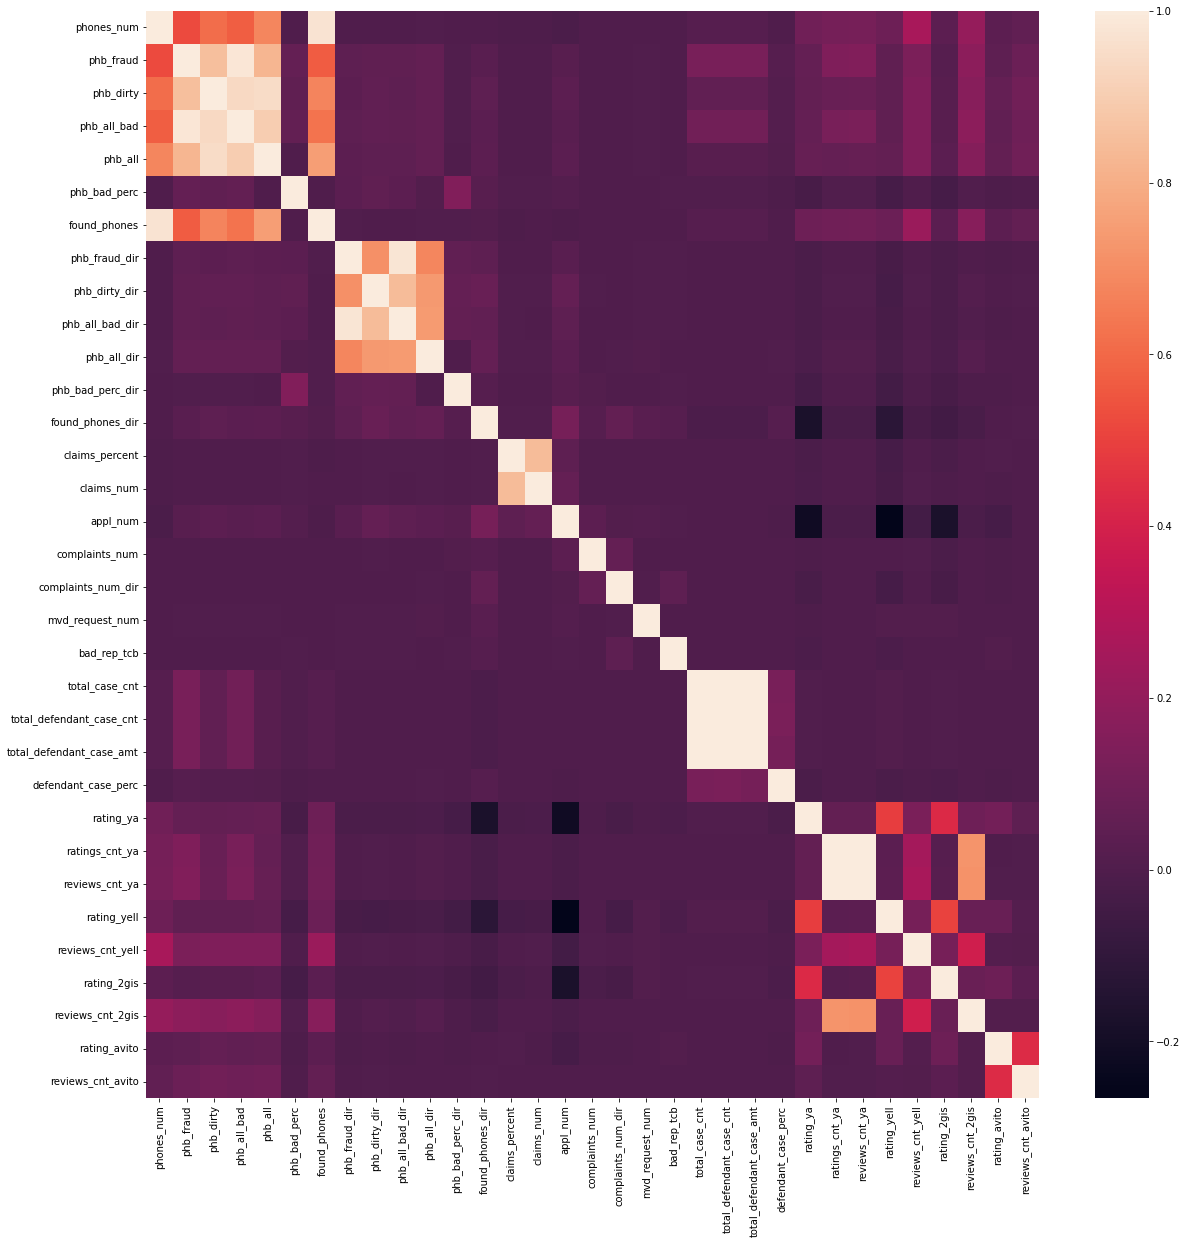

In [336]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr())
plt.savefig("corr.png")

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        15000 non-null  object        
 1   date                      15000 non-null  datetime64[ns]
 2   phones_num                15000 non-null  int64         
 3   phb_fraud                 15000 non-null  float64       
 4   phb_dirty                 15000 non-null  float64       
 5   phb_all_bad               15000 non-null  float64       
 6   phb_all                   15000 non-null  float64       
 7   phb_bad_perc              15000 non-null  float64       
 8   found_phones              15000 non-null  float64       
 9   phb_fraud_dir             15000 non-null  float64       
 10  phb_dirty_dir             15000 non-null  float64       
 11  phb_all_bad_dir           15000 non-null  float64       
 12  phb_all_dir       

In [338]:
data.date = pd.to_datetime(data.date)

In [339]:
to_int_columns = [
    "appl_num",
    "bad_rep_tcb",
    "claims_num",
    "complaints_num",
    "complaints_num_dir",
    "found_phones",
    "found_phones_dir",
    "mvd_request_num",
    "phb_all",
    "phb_all_bad",
    "phb_all_bad_dir",
    "phb_all_dir",
    "phb_dirty",
    "phb_dirty_dir",
    "phb_fraud",
    "phb_fraud_dir",
    "phones_num",
    "ratings_cnt_ya",
    "reviews_cnt_2gis",
    "reviews_cnt_avito",
    "reviews_cnt_ya",
    "reviews_cnt_yell",
    "total_case_cnt",
    "total_defendant_case_amt",
    "total_defendant_case_cnt"
]

In [340]:
data.isna().sum()

id                          0
date                        0
phones_num                  0
phb_fraud                   0
phb_dirty                   0
phb_all_bad                 0
phb_all                     0
phb_bad_perc                0
found_phones                0
phb_fraud_dir               0
phb_dirty_dir               0
phb_all_bad_dir             0
phb_all_dir                 0
phb_bad_perc_dir            0
found_phones_dir            0
claims_percent              0
claims_num                  0
appl_num                    0
complaints_num              0
complaints_num_dir          0
mvd_request_num             0
bad_rep_tcb                 0
total_case_cnt              0
total_defendant_case_cnt    0
total_defendant_case_amt    0
defendant_case_perc         0
rating_ya                   0
ratings_cnt_ya              0
reviews_cnt_ya              0
rating_yell                 0
reviews_cnt_yell            0
rating_2gis                 0
reviews_cnt_2gis            0
rating_avi

In [341]:
data[to_int_columns] = data[to_int_columns].astype(int)

In [342]:
data.id.nunique()

14787

In [343]:
data.duplicated().sum()

0

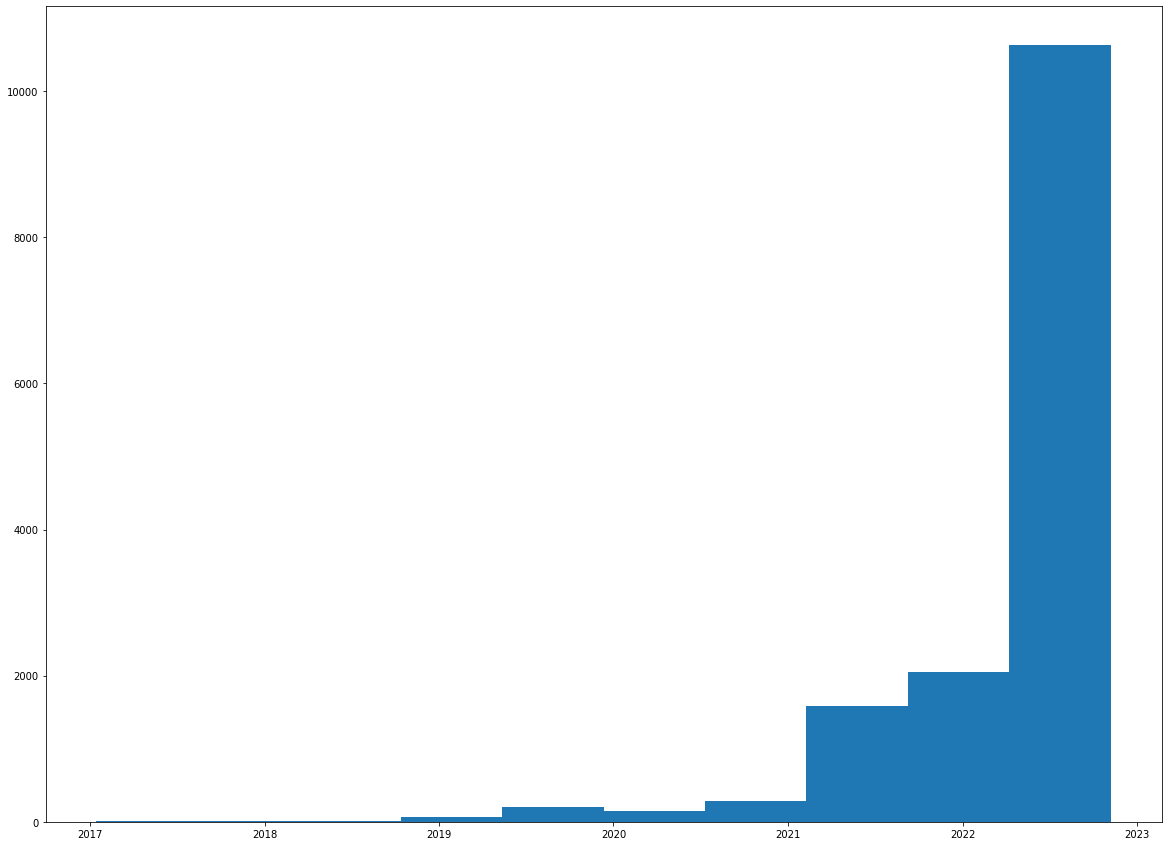

In [344]:
plt.figure(figsize=(20, 15))
plt.hist(data.date)
plt.show()

In [345]:
rating_columns = [
    "rating_ya",
    "rating_yell",
    "rating_avito",
    "rating_2gis",
    "ratings_cnt_ya"
]

In [346]:
data.loc[
    (data.rating_ya != 0) |
    (data.rating_yell != 0) |
    (data.rating_avito != 0) |
    (data.rating_2gis != 0) |
    (data.ratings_cnt_ya != 0)
].shape

(15000, 35)

In [347]:
per(6394)

42.626666666666665

In [348]:
data.loc[
    (data.rating_ya != 0) &
    (data.rating_yell != 0) &
    (data.rating_avito != 0) &
    (data.rating_2gis != 0) &
    (data.ratings_cnt_ya != 0)
    ].shape

(9924, 35)

In [349]:
per(75)

0.5

In [350]:
data.loc[
    (data.rating_ya != 0) &
    (data.rating_yell != 0) &
    (data.rating_avito != 0) &
    (data.rating_2gis != 0) &
    (data.ratings_cnt_ya != 0)
    ].phones_num.mean()

14.998790810157194

In [351]:
rating_columns

['rating_ya', 'rating_yell', 'rating_avito', 'rating_2gis', 'ratings_cnt_ya']

In [352]:
data.loc[data.rating_yell != 0].rating_yell.mean()

0.9665533070090362

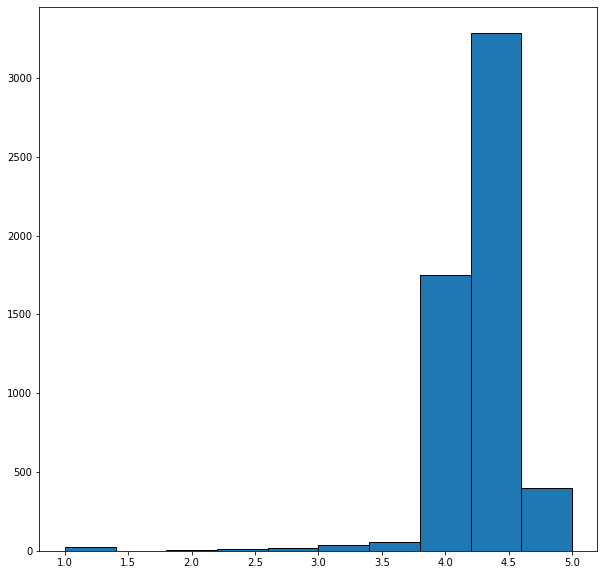

In [371]:
plt.figure(figsize=(10, 10))
plt.hist(data.loc[data.rating_yell != -1].rating_yell, edgecolor='black')
plt.show()

In [354]:
data.loc[data.rating_2gis != 0].rating_2gis.mean()

-0.3295821142466578

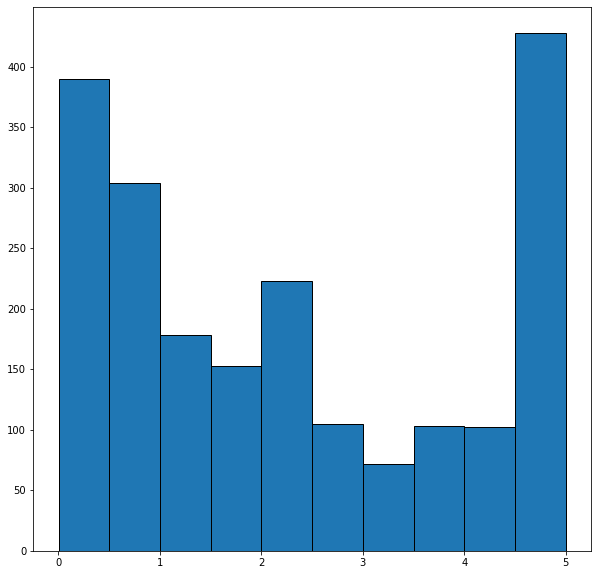

In [374]:
plt.figure(figsize=(10, 10))
plt.hist(data.loc[data.rating_2gis > 0].rating_2gis, edgecolor='black')
plt.show()

In [375]:
data.loc[data.rating_2gis != -1].rating_2gis.min()

0.0

In [376]:
data.loc[data.rating_ya != -1].rating_ya.mean()

3.9337455830388692

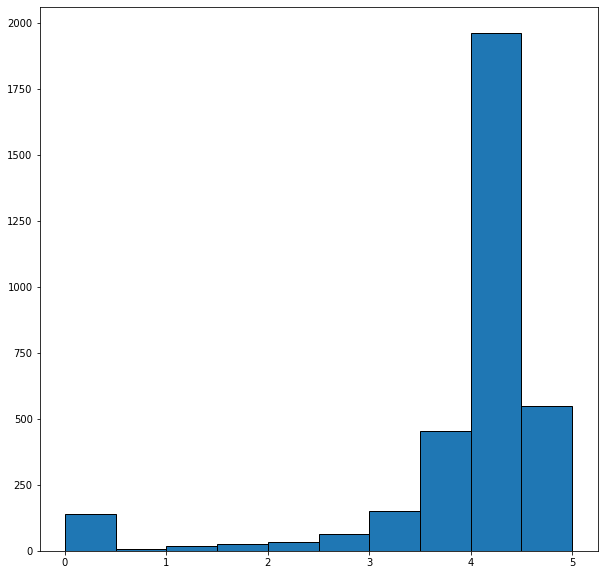

In [377]:
plt.figure(figsize=(10, 10))
plt.hist(data.loc[data.rating_ya != -1].rating_ya, edgecolor='black')
plt.show()

In [380]:
data.loc[data.rating_avito != -1].rating_avito.mean()

3.920486553432413

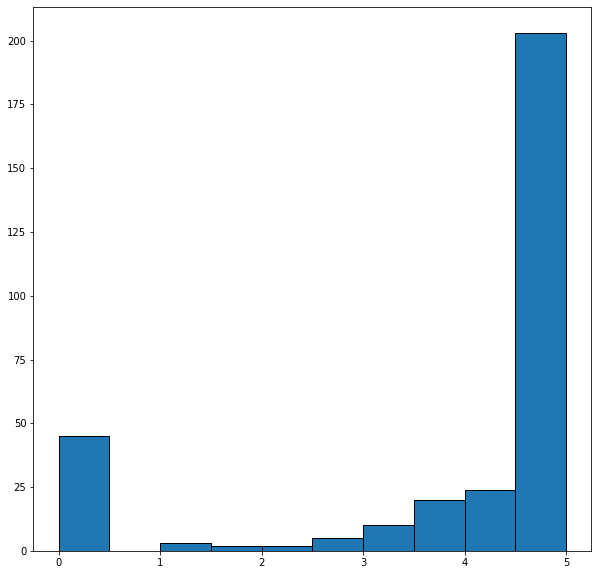

In [381]:
plt.figure(figsize=(10, 10))
plt.hist(data.loc[data.rating_avito != -1].rating_avito, edgecolor='black')
plt.show()

In [391]:
data_rating_2gs = data.copy()

In [392]:
data_rating_2gs.rating_2gis = data_rating_2gs.rating_2gis.apply(lambda x: round(x * 2) / 2)

In [393]:
data_rating_2gs.groupby("rating_2gis").mean()

,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,phb_dirty_dir,phb_all_bad_dir,...,total_defendant_case_amt,defendant_case_perc,rating_ya,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,reviews_cnt_2gis,rating_avito,reviews_cnt_avito
rating_2gis,,,,,,,,,,,,,,,,,,,,,
-1.0,3.990342,1.266110,0.633055,1.899166,1731.767578,0.117293,3.536007,0.395070,0.229794,0.624865,...,1.757242e+04,0.249958,-0.251582,41.149436,13.405965,0.532443,0.237521,0.000155,-0.926989,0.685056
0.0,219.420382,49.146497,19.898089,69.044586,42222.038217,0.067325,156.821656,0.152866,0.140127,0.292994,...,3.486548e+03,0.212293,3.130127,9335.267516,2884.363057,4.127958,26.210191,99.847134,-0.675159,0.859873
0.5,223.842593,31.722222,19.117284,50.839506,54875.311728,0.066451,183.756173,0.462963,0.493827,0.956790,...,-6.628036e+06,0.191728,3.262130,6082.799383,1844.601852,4.043560,15.842593,126.814815,-0.456790,1.854938
1.0,59.742574,22.115512,13.620462,35.735974,31325.422442,0.051155,54.881188,0.240924,0.240924,0.481848,...,4.814195e+03,0.076172,2.281320,1477.247525,448.267327,3.574467,12.953795,75.498350,-0.715475,2.145215
1.5,21.322034,4.819209,2.598870,7.418079,11343.988701,0.060113,15.039548,0.124294,0.197740,0.322034,...,0.000000e+00,0.000000,2.717740,2086.124294,681.163842,3.698145,12.898305,80.350282,-0.837006,1.338983
2.0,14.509259,0.296296,0.453704,0.750000,3710.518519,0.013148,10.564815,0.092593,0.101852,0.194444,...,4.166667e+01,0.740741,2.264167,342.509259,106.250000,4.074932,13.620370,64.898148,-0.806636,4.777778
2.5,11.004854,5.155340,4.300971,9.456311,5076.805825,0.068447,9.907767,0.140777,0.174757,0.315534,...,0.000000e+00,0.000000,2.512136,390.684466,150.665049,3.689526,5.631068,64.417476,-0.722168,2.839806
3.0,8.382353,0.225490,0.823529,1.049020,3563.666667,0.055000,7.431373,0.068627,0.049020,0.117647,...,5.437059e+02,0.980392,2.325196,331.598039,115.794118,3.568526,11.676471,36.215686,-0.704412,2.284314
3.5,7.487500,0.550000,0.350000,0.900000,3637.137500,0.015375,6.250000,0.137500,0.100000,0.237500,...,0.000000e+00,0.000000,2.768750,381.187500,141.250000,4.140557,14.712500,59.825000,-0.772500,0.237500


<AxesSubplot:xlabel='rating_2gis', ylabel='appl_num'>

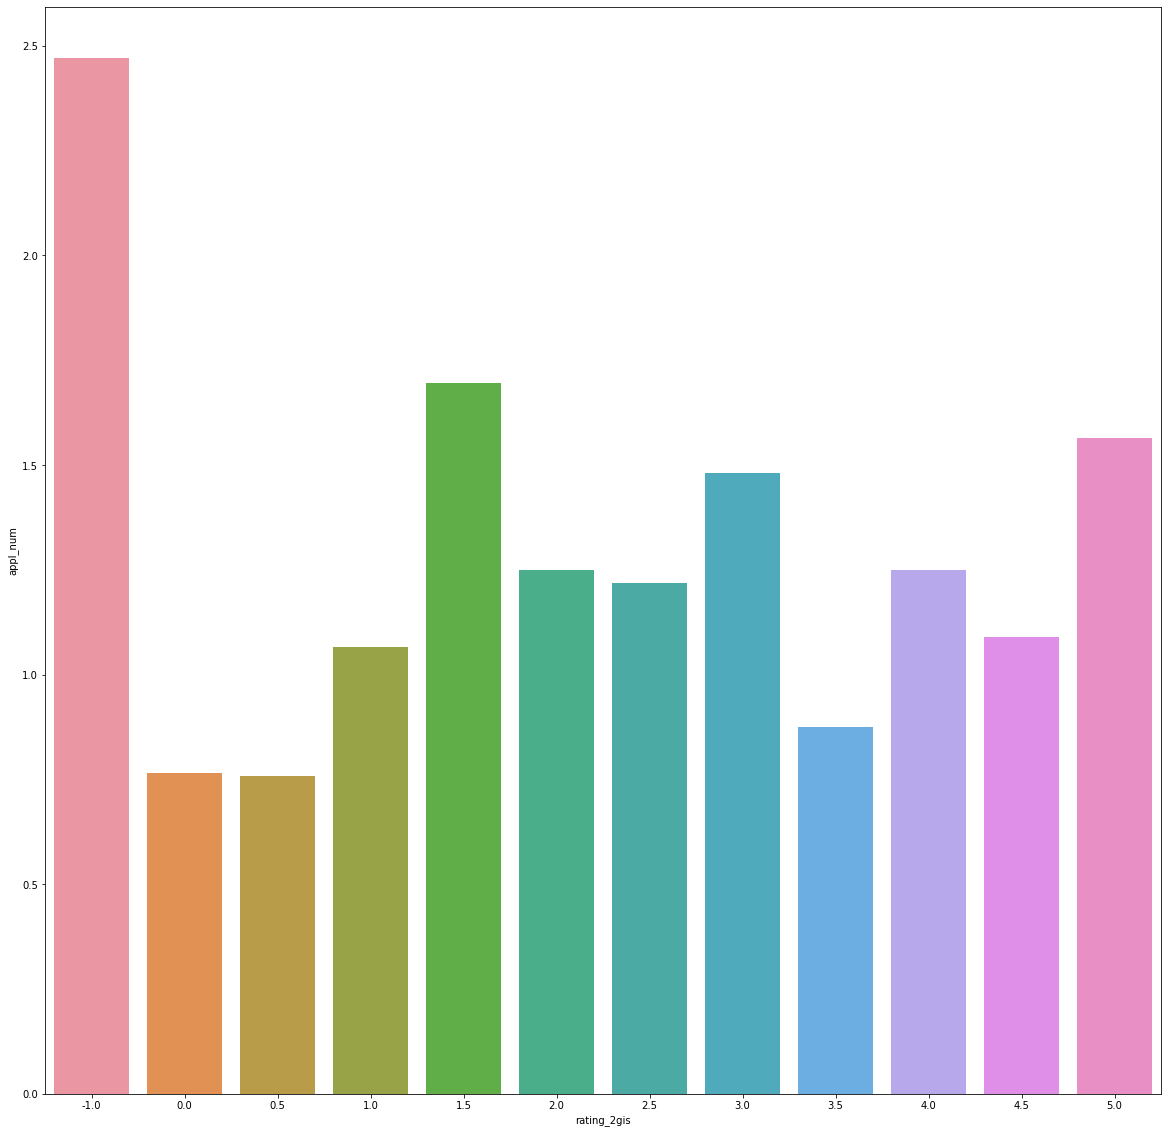

In [394]:
plt.figure(figsize=(20, 20))
sns.barplot(x=data_rating_2gs.groupby("rating_2gis").mean().index, y=data_rating_2gs.groupby("rating_2gis").mean().appl_num)

In [ ]:
data.loc[data.id == "a761108068187a"]